In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
df = pd.read_csv("epa-sea-level.csv")

In [3]:
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


<Axes: xlabel='Year', ylabel='CSIRO Adjusted Sea Level'>

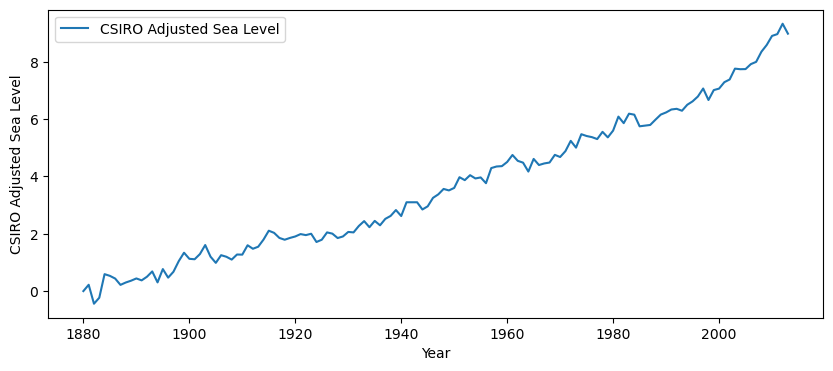

In [4]:
fig, ax = plt.subplots(figsize=(10,4), dpi=100)
ax.set_xlabel("year")
ax.set_ylabel("CSIRO Adjusted Sea Level")
df.plot(ax=ax, x="Year", y="CSIRO Adjusted Sea Level")

In [5]:
res = linregress(x=df["Year"],y=df["CSIRO Adjusted Sea Level"])

In [6]:
res

LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)

In [7]:
slope = 0.0630445840121348

In [8]:
intercept = -119.06594196773978

In [9]:
y_line = slope * df["Year"] + intercept

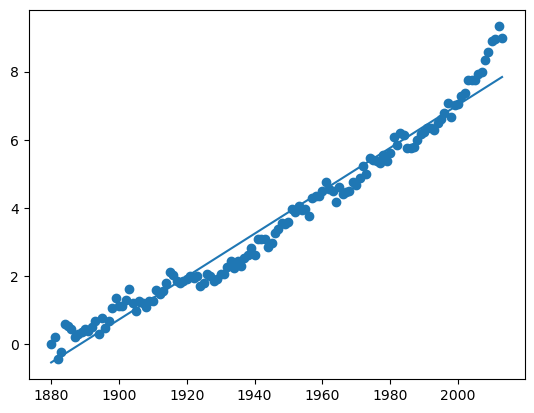

In [10]:
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], label = "data points" )
plt.plot(df["Year"], y_line, label="Line of best fit")

(1880.0, 2050.0)

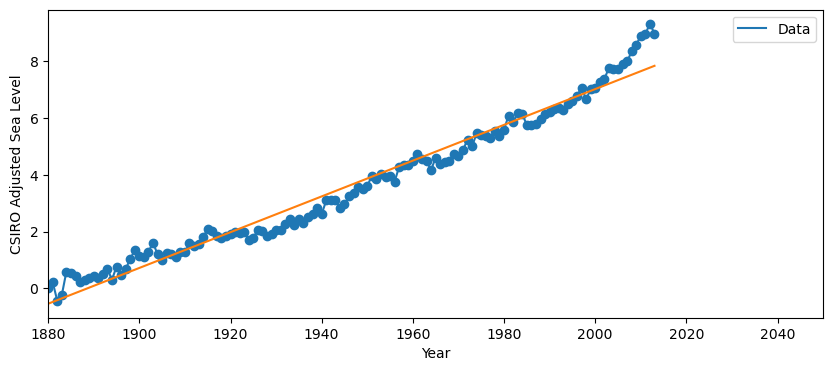

In [11]:
fig, axis = plt.subplots(figsize=(10,4), dpi=100)
df.plot(ax=axis, x="Year", y="CSIRO Adjusted Sea Level", label="Data")
axis.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], label="Data points")
axis.plot(df["Year"], y_line, label="Line of best fit")
axis.set_xlabel("Year")
axis.set_ylabel("CSIRO Adjusted Sea Level")
axis.set_xlim(df["Year"].min(), 2050)

In [12]:
years_to_predict = np.arange(df["Year"].min(), 2051)
predicted_sea_levels = slope * years_to_predict + intercept

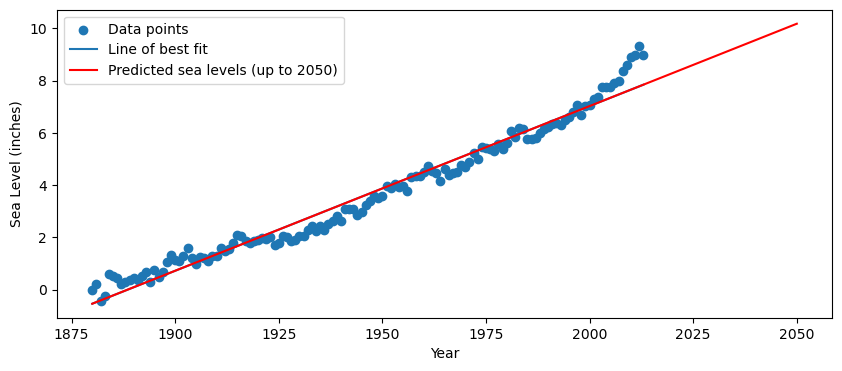

In [13]:
plt.figure(figsize=(10, 4), dpi=100)
plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], label="Data points")
plt.plot(df["Year"], slope * df["Year"] + intercept, label="Line of best fit")
plt.plot(years_to_predict, predicted_sea_levels, label="Predicted sea levels (up to 2050)", color="red")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.legend()

In [14]:
df2000 = df.drop(df[df['Year'] < 2000].index)

In [15]:
df2000

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


In [16]:
res2000 = linregress(x = df2000["Year"], y = df2000["CSIRO Adjusted Sea Level"])

In [17]:
res2000

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)

In [18]:
y_line_2000 = res2000[0] * df2000["Year"] + res2000[1]

In [19]:
years_to_predict_2000 = np.arange(df2000["Year"].min(), 2051)

In [20]:
predicted_sea_levels_2000 = res2000[0] * years_to_predict_2000 + res2000[1]

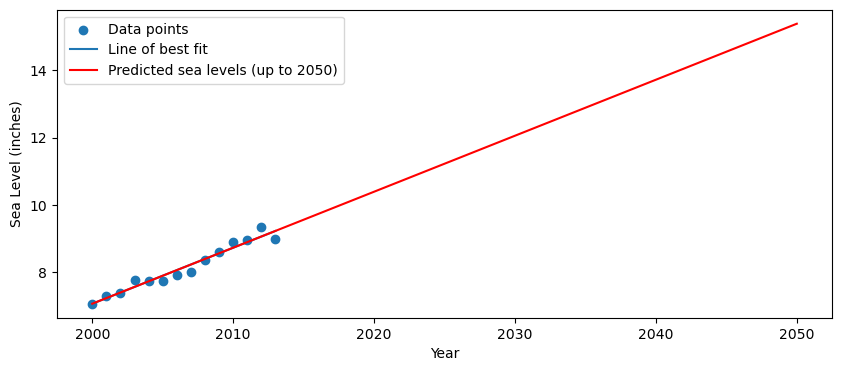

In [21]:
plt.figure(figsize=(10, 4), dpi=100)
plt.scatter(df2000["Year"], df2000["CSIRO Adjusted Sea Level"], label="Data points")
plt.plot(df2000["Year"], res2000[0] * df2000["Year"] + res2000[1], label="Line of best fit")
plt.plot(years_to_predict_2000, predicted_sea_levels_2000, label="Predicted sea levels (up to 2050)", color="red")
plt.xlabel("Year")
plt.ylabel("Sea Level (inches)")
plt.legend()